In [ ]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import norm




## Entropia
A Entropia de Shannon, proposta por Claude Shannon na década de 1940, é uma medida matemática da quantidade de informação ou surpresa associada a um evento ou sistema. Ela é amplamente utilizada na teoria da informação e na ciência da computação.

A Entropia de Shannon para um sistema com
n eventos possíveis, cada um com uma probabilidade Pi, é dada pela seguinte fórmula:
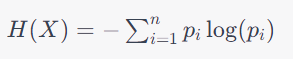

Aqui,
- H(X) é a entropia do sistema X
- Pi é a probabilidade do evento e o somatório percorre todos os eventos possíveis.

Essa medida quantifica o grau de incerteza ou surpresa associado ao sistema. Quanto maior a entropia, maior a incerteza. A entropia é máxima quando todos os eventos são igualmente prováveis.

Talvez você se pergunte porque diabos o cálculo da entropia envolve logaritmos (pesadelo de muitos alunos) mas é por uma questão de necessidade como mostrarei ja já.

Para casos onde X é uma variável aleatória com uma função densidade associada, temos que a entropia será dada por:
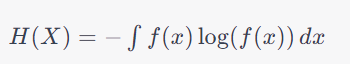

- A função densidade de probabilidade (PDF) é utilizada para descrever a probabilidade relativa de uma variável aleatória contínua assumir determinados valores em todo o seu espaço amostral. Essa função representa a distribuição de probabilidade da variável.
- Para calcular a entropia total do sistema, podemos realizar uma integração da função densidade de probabilidade ao longo de todo o espaço amostral. Isso nos dá uma medida da incerteza total ou surpresa associada à variável aleatória contínua.

Mas vale lembrar:
 - Distribuição Contínua (como a Uniforme Contínua ou a Normal): Pode-se utilizar a função densidade de probabilidade (PDF) para descrever a probabilidade de um evento ocorrer em um intervalo específico.
 - Distribuição Discreta (como a Bernoulli, Binomial, etc.): Não é apropriado usar a função densidade de probabilidade (PDF) porque nesses casos a probabilidade é concentrada em valores discretos. Para esses casos, usamos o PMF (Função de Massa de Probabilidade)

#### Vamos testar três casos:
1. Uma caixa onde há uma bola verde e seis azuis
2. Uma caixa onde há duas bolas verde e cinco azuis
3. Uma caixa onde há três bolas verdes e quatro azuis




# 0

In [ ]:
#Criando a função para tal:

def calcular_entropia(probabilidades):
  entropia = 0

  for p in probabilidades:
    if p != 0:
      entropia = entropia - p * math.log(p)

  return entropia


# 1° Caso

In [ ]:
probabilidades = [1/7, 6/7]

entropia_bolas = calcular_entropia(probabilidades)
surpresa_esperada = 1 / entropia_bolas

print(f"A entropia das bolas na caixa é: {entropia_bolas}")
print(f"A surpresa esperada ao retirar uma bola é: {surpresa_esperada}")



A entropia das bolas na caixa é: 0.410116318288409
A surpresa esperada ao retirar uma bola é: 2.438332627615083


# 2° Caso

In [ ]:
probabilidades = [2/7, 5/7]

entropia_bolas = calcular_entropia(probabilidades)
surpresa_esperada = 1 / entropia_bolas
print(f"A entropia das bolas na caixa é: {entropia_bolas}")
print(f"A surpresa esperada ao retirar uma bola é: {surpresa_esperada}")

A entropia das bolas na caixa é: 0.5982695885852573
A surpresa esperada ao retirar uma bola é: 1.6714872677461752


# 3° Caso

In [ ]:
probabilidades = [3/7, 4/7]

entropia_bolas = calcular_entropia(probabilidades)
surpresa_esperada = 1 / entropia_bolas
print(f"A entropia das bolas na caixa é: {entropia_bolas}")
print(f"A surpresa esperada ao retirar uma bola é: {surpresa_esperada}")


A entropia das bolas na caixa é: 0.6829081047004717
A surpresa esperada ao retirar uma bola é: 1.4643258633438052


Percebeu que conforme eu vou colocando mais variação de bolinhas na caixa (azuis e verdes cada vez mais misturadas) a entropia aumenta e a surpresa diminui?

É bem intuitivo pensar isso. Se eu tenho mais bolinhas, tanto azuis como verdes, **eu não ficarei surpreso se sair verde ou azul, porque o sistema está mais desorganizado e aleatório**. Por isso, há uma relação inversa aqui:

>  ## ➕ Entropia  ➖ Surpresa
> ##  ➖ Entropia  ➕Surpresa


### Por que Logaritmo?
Aqui vou explicar porque usamos logaritmos nas fórmulas da entropia.
- Primeiro, sabemos que entropia está ligada a probabilidade, como vimos antes.
- Segundo, e consequentemente, a probabilidade tem valor máximo igual a 1
- Terceiro, o logaritmo de 1 é sempre 0

Deu pra pegar a ideia já? Se não, veja como calculamos a surpresa usando o primeiro exemplo.

Lembre-se que o a surpresa que calculamos antes foi a **surpresa média**. Vamos agora verificar a surpresa pra cada evento

## a) Sem Logaritmo

In [ ]:
probabilidades = [1/7, 6/7]

# Surpresa se eu tirar a bola verde
surpresa_v = 1 / probabilidades[0]

# Surpresa se eu tirar a bola azul
surpresa_a= 1 /probabilidades[1]

print(f"Surpresa se tirar uma bola verde: {surpresa_v}")
print(f"Surpresa se tirar uma bola azul: {surpresa_a}")

Surpresa se tirar uma bola verde: 7.0
Surpresa se tirar uma bola azul: 1.1666666666666667


Claramente, ficaria mais surpreso se tirar uma bola verde. Mas perceba que a fórmula para a surpresa é:

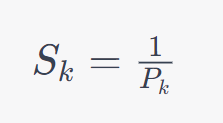

## Gráfico
O gráfico dela seria mais ou menos assim:

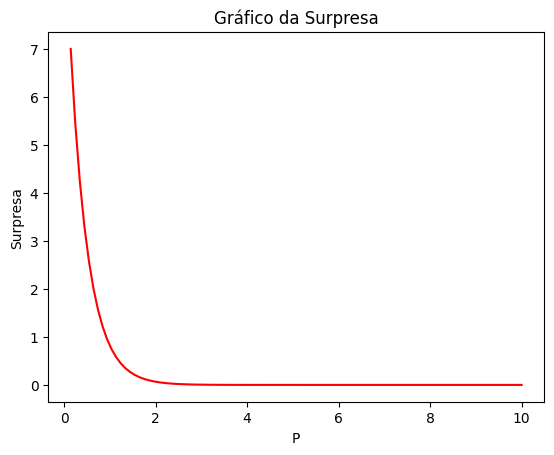

In [ ]:

y_values = [1/p for p in probabilidades]

params = np.polyfit(probabilidades, np.log(y_values), 1)
a, b = params


x_fit = np.linspace(min(probabilidades), 10, 100)
y_fit = np.exp(a * x_fit + b)
plt.plot(x_fit, y_fit, color='red', label='Curva de Ajuste')


plt.xlabel('P')
plt.ylabel('Surpresa')
plt.title('Gráfico da Surpresa')

# Exibindo o gráfico
plt.show()

Note que conforme a probabilidade aumenta, a surpresa tende a zero, mas nunca é zero.

Como probabilidades estão entre 0 e 1, devemos ajustar o gráfico para que quando:
> Probabilidade = 1, então Surpresa = 0

E para isso que serve o logaritmo no nosso caso:

## b) Com Logaritmo

In [ ]:
surpresa_v = math.log(surpresa_v)
surpresa_a = math.log(surpresa_a)
print(f"Surpresa se tirar uma bola verde: {surpresa_v}")
print(f"Surpresa se tirar uma bola azul: {surpresa_a}")

Surpresa se tirar uma bola verde: 1.9459101490553132
Surpresa se tirar uma bola azul: 0.15415067982725836


## Gráfico

O gráfico agora para no 1. Veja:

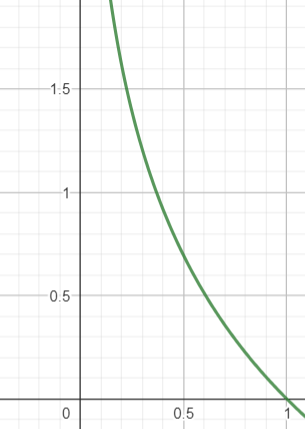


## Probabilidades

Dito isso, vemos que podemos usar o conceito de entropia quando estuda distribuições de probabilidade. A entropia é uma medida útil para quantificar a incerteza associada a uma distribuição de probabilidade.

Ao lidar com distribuições de probabilidade, a entropia de Shannon é frequentemente usada para avaliar o quão "desordenada" ou "incerta" é a distribuição. Quanto maior a entropia, maior a incerteza associada à distribuição. Veja algumas aplicações:

1. Avaliação da Incerteza: A entropia pode ser usada para quantificar o grau de incerteza em uma distribuição. **Por exemplo, em uma distribuição uniforme, onde todos os eventos são igualmente prováveis, a entropia é máxima.**

2. Comparação de Distribuições: Você pode usar a entropia para comparar diferentes distribuições de probabilidade. **A distribuição com maior entropia terá maior incerteza.**

3. Codificação de Fontes: Em teoria da informação, a entropia é usada para projetar códigos de compressão eficientes. Distribuições com alta entropia tendem a se beneficiar mais de técnicas de compressão.

4. Tomada de Decisão: A entropia pode ser usada em teoria de decisão para avaliar a incerteza associada a diferentes escolhas.

5. Teoria dos Jogos: A entropia é utilizada em teoria dos jogos para medir a incerteza estratégica em um jogo.



### Exemplo da entropia no lançamento de um dado

Vamos analisar há algum padrão em distribuições de determinado tipo quanto à sua entropia.

Começando pela distribuição uniforme mais famosa, o lançamento de um dado:

- A distribuição de um dado é **uniforme**, como todos sabemos, ou seja, todas as faces tem chances iguais de aparecerem num lançamento aleatório
- A distribuição de um dado viciado, ou de um outro sistema, que também possua 6 eventos possíveis, será interessante para efeito de comperação

Ou seja, **vamos comparar a entropia em um sistema uniforme com outro de distribuição aleatória**

## 1 - Criando algumas funções auxiliares
Note que é opcional a criação, mas como todo bom programador adora criar funções e recursos para deixar na sua caixa de ferramentas, vamos a elas:

In [ ]:
# Função que, dado  um n (tamanho do espaço amostral), retorna a distribuição uniforme de probabilidades
#Exemplo: Para cara e coroa, usariamos a função com o parâmetro de entrada 2, retornando-nos uma lista com [0.5, 0.5]

def uniforme(n):
  lista = []
  for i in range(0,n):
    termo = 1/n
    lista.append(termo)
  return lista


# Função que, dado o mesmo n, retorna uma distribuição aleatória

def dist_aleatoria(n):
    if n <= 0:
        raise ValueError("O tamanho da distribuição deve ser maior que zero.")

    probabilidades = [random.random() for _ in range(n)]
    soma = sum(probabilidades)
    dist = [prob / soma for prob in probabilidades]

    return dist



## a)  Verificando entropia de um sistema uniforme

In [ ]:
# Exemplo 1: distribuição de probabilidade para um dado não viciado. Pelo ponto 1, vemos que, nas condições do problema, a entropia resultante será máxima.
prob_dado = uniforme(6)

entropia_dado = calcular_entropia(prob_dado)
print(f"A entropia do dado com distribuição uniforme é: {entropia_dado}")


A entropia do dado com distribuição uniforme é: 1.7917594692280547


In [ ]:
# Exemplo de uso
probabilidades = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
entropia = calcular_entropia(probabilidades)
print(entropia)

1.7917594692280547


## b)  Verificando entropia de um sistema não uniforme

In [ ]:

# Exemplo 2: distribuição de probabilidade para uma amostra em um espaço amostral de tamanho 6. A entropia desse sistema qualquer é menor do que a do sistema do dado não viciado
prob_dado2 = dist_aleatoria(6)

entropia_dado2 = calcular_entropia(prob_dado2)
print(f"A entropia do dado SEM distribuição uniforme é: {entropia_dado2}")





A entropia do dado SEM distribuição uniforme é: 1.7019852804566609


Pela variação estocástica, é claro que a entropia não será sempre a mesma quando rodamos o código várias vezes, mas **a entropia do sistema de distribuição qualquer nunca chega a ser igual à entropia do sistema uniforme**

###**E as outras distribuições...**

A famigerada distribuição normal também apresenta um certo padrão entrópico.

Como ela se concentra ao redor da média, a sua entropia é menor do que, por exemplo, a entropia de uma distribuição uniforme. Mas será que é menor do que uma distribuição aleatória qualquer fornecida pela nossa função?
Para isso, vou usar um DataFrame que usei em outro notebook para explicar o Standard Scaler (inclusive, o [link](https://medium.com/@mhvasconcelos/distribui%C3%A7%C3%A3o-normal-e-a-biblioteca-standard-scaler-em-python-f21c52070c6b) para o artigo que eu escrevi sobre no Medium tá aqui)

## Criando o DataFrame
A tabela monitora o horário de entrada de alunos em uma faculdade. Ela segue uma distribuição normal em torno de 10h:

In [ ]:


df = pd.DataFrame(
[('Nicolas Miqueias', 10),
('Cleiton Araújo', 10),
('Artur Martins', 10),
('Ernani Sousa', 10),
('Eduardo Gomes', 8),
('Guilherme Bastos', 8),
('Lucas Santos', 12),
('Larissa Santos', 12),
('Lia Souza', 6),
('Rafael Peres', 14)],
columns=('nome', 'horário'))


df

,nome,horário
0,Nicolas Miqueias,10
1,Cleiton Araújo,10
2,Artur Martins,10
3,Ernani Sousa,10
4,Eduardo Gomes,8
5,Guilherme Bastos,8
6,Lucas Santos,12
7,Larissa Santos,12
8,Lia Souza,6
9,Rafael Peres,14


## Explorando informações:


- ### Sabemos que uma distribuição normal tem média = moda = mediana

In [ ]:

df['horário'].mean() == df['horário'].median() == df['horário'].mode()[0]


True

- ### Outra informação importante é o desvio padrão dos valores em relação a média:

In [ ]:
df['horário'].std()

2.309401076758503

- ## Graficamente, podemos ver a distribuição no formato de sino

<ipython-input-381-a7d2674925b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horário'],hist = False)


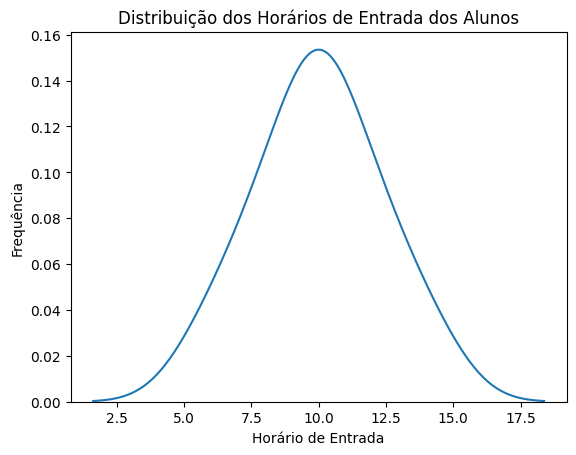

In [ ]:
sns.distplot(df['horário'],hist = False)
plt.xlabel('Horário de Entrada')
plt.ylabel('Frequência')
plt.title('Distribuição dos Horários de Entrada dos Alunos')

# Mostrar o gráfico
plt.show()

## Descobrindo as probabilidades de cada evento (horários)
- Claro que a soma das porcentagens não dará exatamente 100%, mas para efeito de didática, vamos arredondar as probabilidades dos eventos que temos para obtermos algo mais "correto".

In [ ]:
media = df['horário'].mean()
desvio_padrao = df['horário'].std()

# Probabilidade de chegar às 6h
prob_6h = norm.cdf(6, loc=media, scale=desvio_padrao)
prob_6h = round(prob_6h,2)
# Probabilidade de chegar às 8h
prob_8h = norm.cdf(8, loc=media, scale=desvio_padrao)
prob_8h = round(prob_8h,1)
# Probabilidade de chegar às 10h
prob_10h = norm.cdf(10, loc=media, scale=desvio_padrao)
prob_10h = round(prob_10h,1)
# Probabilidade de chegar às 12h
prob_12h = 1 - norm.cdf(12, loc=media, scale=desvio_padrao)
prob_12h = round(prob_12h,1)
# Probabilidade de chegar às 14h
prob_14h = 1 - norm.cdf(14, loc=media, scale=desvio_padrao)
prob_14h = round(prob_14h,2)

print(f"A probabilidade do aluno sair às 6h é: {prob_6h*100:.2f}%")
print("\n")
print(f"A probabilidade do aluno sair às 8h é: {prob_8h*100:.2f}%")
print("\n")
print(f"A probabilidade do aluno sair às 10h é: {prob_10h*100:.2f}%")
print("\n")
print(f"A probabilidade do aluno sair às 12h é: {prob_12h*100:.2f}%")
print("\n")
print(f"A probabilidade do aluno sair às 14h é: {prob_14h*100:.2f}%")
print("\n")



A probabilidade do aluno sair às 6h é: 4.00%


A probabilidade do aluno sair às 8h é: 20.00%


A probabilidade do aluno sair às 10h é: 50.00%


A probabilidade do aluno sair às 12h é: 20.00%


A probabilidade do aluno sair às 14h é: 4.00%




Agora sim, temos uma distribuição de probabilidades normal, pelo menos para fins de representação

## Comparando as entropias das distribuições
### Normal X Uniforme

Lembrando que:
- Na distribuição normal, a incerteza é relativamente baixa, pois a maioria dos eventos está próxima da média.
- Na distribuição uniforme, a incerteza é máxima, pois é impossível prever qual valor será observado.

In [ ]:
# Distribuição Normal

prob_nor = [prob_6h, prob_8h, prob_10h, prob_12h, prob_14h]
entropia_nor = calcular_entropia(prob_nor)
print(f"A entropia da distribuição NORMAL é: {entropia_nor}")


# Distribuição uniforme

prob_uni = uniforme(5)
entropia_uni = calcular_entropia(prob_uni)
print(f"A entropia da distribuição UNIFORME é: {entropia_uni}")

A entropia da distribuição NORMAL é: 1.2478588212430688
A entropia da distribuição UNIFORME é: 1.6094379124341005


Minhas redes:
- [Linkedin](https://www.linkedin.com/in/vasconcelosmatheus/)
- [Medium](https://medium.com/@mhvasconcelos)